In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


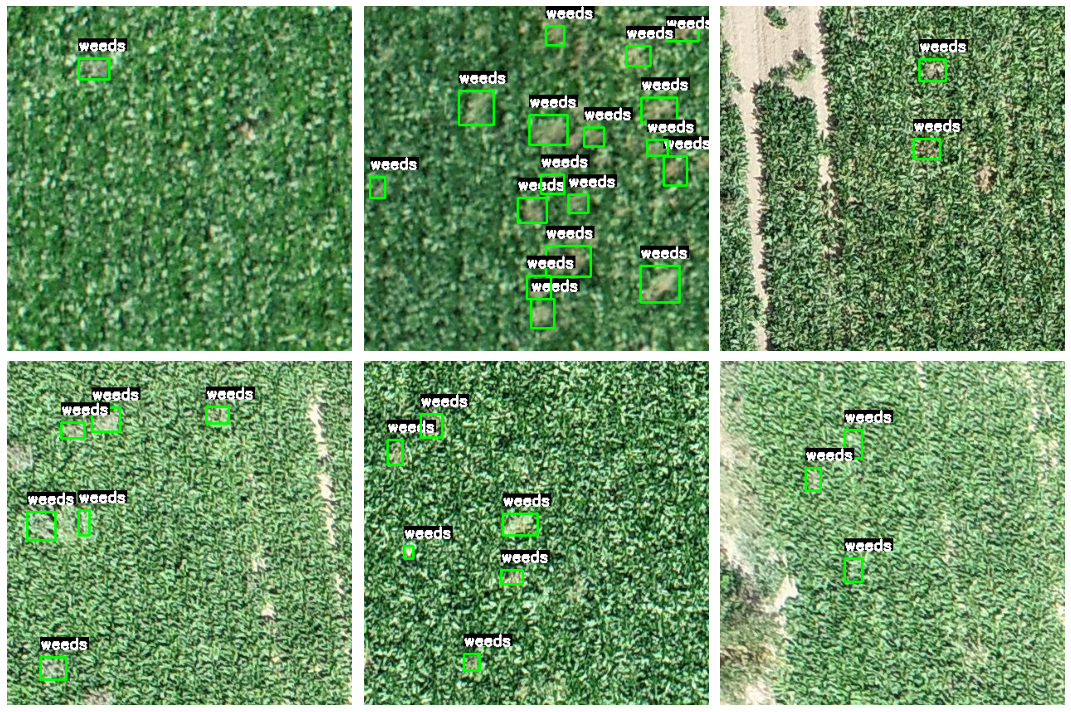

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=100, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='3_aug',
            batch=32, device=device, seed=69,
            mixup=0.4,
            erasing=0.3,
            fliplr=0.4)

New https://pypi.org/project/ultralytics/8.3.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=100, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=3_aug, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /home/user/CourseWork/Weed_UAV/train/labels.cache... 2872 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2872/2872 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/Weed_UAV/valid/labels.cache... 501 images, 1 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<?, ?it/s]


Plotting labels to YOLO11s/3_aug/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO11s/3_aug
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.46G      2.909      3.009      1.571        107        416: 100%|██████████| 90/90 [00:13<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

                   all        501       1180      0.291      0.357      0.247     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.44G      2.547      2.323      1.346        119        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]

                   all        501       1180      0.369      0.446      0.333      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.45G      2.538      2.293      1.332        122        416: 100%|██████████| 90/90 [00:11<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]


                   all        501       1180      0.519      0.465      0.442      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.47G      2.497      2.223      1.318        139        416: 100%|██████████| 90/90 [00:11<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]


                   all        501       1180      0.366      0.432      0.334        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.48G      2.494      2.233      1.319        142        416: 100%|██████████| 90/90 [00:10<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]


                   all        501       1180      0.419      0.447      0.379      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.48G      2.476      2.202      1.305        103        416: 100%|██████████| 90/90 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.537      0.506      0.479      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.47G      2.475      2.201      1.303        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]


                   all        501       1180      0.504      0.468      0.427      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.49G      2.461      2.181      1.294         97        416: 100%|██████████| 90/90 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]


                   all        501       1180      0.401      0.401      0.334      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.48G      2.441      2.129      1.281        152        416: 100%|██████████| 90/90 [00:11<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]


                   all        501       1180      0.507       0.49      0.452      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.47G      2.425       2.16      1.288        135        416: 100%|██████████| 90/90 [00:11<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]


                   all        501       1180      0.519      0.502      0.488       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.48G      2.439      2.134      1.287         99        416: 100%|██████████| 90/90 [00:11<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]


                   all        501       1180       0.56      0.481      0.483       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.46G       2.43       2.11      1.281        113        416: 100%|██████████| 90/90 [00:11<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]


                   all        501       1180      0.575      0.505      0.518      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.46G      2.412      2.076      1.287        112        416: 100%|██████████| 90/90 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]

                   all        501       1180      0.536      0.387      0.423      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.48G      2.413      2.085      1.272        109        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]


                   all        501       1180      0.601      0.524      0.536      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.46G      2.415       2.08      1.278        106        416: 100%|██████████| 90/90 [00:11<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]


                   all        501       1180       0.57      0.495      0.515      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.46G      2.394      2.057      1.269         80        416: 100%|██████████| 90/90 [00:11<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]


                   all        501       1180      0.545      0.509      0.516      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.46G      2.406      2.058      1.275         86        416: 100%|██████████| 90/90 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]

                   all        501       1180      0.612      0.498      0.522      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.45G      2.402      2.057      1.273         84        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180      0.508      0.442      0.426      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.46G       2.39      2.035       1.27        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]


                   all        501       1180      0.548      0.484      0.485      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.48G      2.382      2.036      1.253        122        416: 100%|██████████| 90/90 [00:11<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        501       1180      0.593      0.499      0.506      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.48G      2.406      2.059      1.258        104        416: 100%|██████████| 90/90 [00:09<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]


                   all        501       1180      0.538      0.525      0.502      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.48G       2.38      2.027      1.258        137        416: 100%|██████████| 90/90 [00:11<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180      0.579      0.504      0.527      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.48G      2.385      2.014      1.264        132        416: 100%|██████████| 90/90 [00:11<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        501       1180      0.584      0.519      0.522       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.46G      2.389      2.019       1.26        162        416: 100%|██████████| 90/90 [00:11<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180      0.562      0.516      0.497      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.48G      2.392      2.038      1.262        160        416: 100%|██████████| 90/90 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


                   all        501       1180      0.598      0.523      0.526      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.47G      2.359      1.983      1.247        125        416: 100%|██████████| 90/90 [00:11<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180      0.568      0.482      0.515       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.48G      2.377      2.028      1.259        106        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]


                   all        501       1180       0.59      0.522      0.553      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.49G      2.369      2.001      1.263        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]


                   all        501       1180      0.569      0.502      0.503      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.48G      2.357      1.982      1.248         76        416: 100%|██████████| 90/90 [00:11<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]


                   all        501       1180      0.598      0.514      0.538      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.46G      2.349      1.968       1.25         99        416: 100%|██████████| 90/90 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]


                   all        501       1180      0.601      0.554      0.556      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.46G       2.36       1.97      1.243        112        416: 100%|██████████| 90/90 [00:11<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]


                   all        501       1180      0.614      0.512      0.549       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.47G      2.361      1.974      1.245        158        416: 100%|██████████| 90/90 [00:11<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        501       1180      0.596      0.547      0.552      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.46G      2.376       1.98      1.254         88        416: 100%|██████████| 90/90 [00:11<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]


                   all        501       1180      0.594      0.562      0.561      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.48G      2.353      1.971      1.254         64        416: 100%|██████████| 90/90 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]


                   all        501       1180      0.584      0.585      0.569      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.46G      2.337      1.961      1.241         91        416: 100%|██████████| 90/90 [00:11<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]


                   all        501       1180      0.575      0.537      0.548      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.48G      2.348       1.96      1.236        118        416: 100%|██████████| 90/90 [00:11<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]


                   all        501       1180      0.591      0.538      0.559      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.47G      2.355      1.947      1.239         98        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]


                   all        501       1180       0.59      0.592      0.575      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.46G      2.358      1.971      1.242        125        416: 100%|██████████| 90/90 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]


                   all        501       1180      0.629      0.555      0.586      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.46G       2.34      1.935      1.231         76        416: 100%|██████████| 90/90 [00:11<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        501       1180      0.605       0.56      0.562      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.48G      2.356       1.95      1.237        117        416: 100%|██████████| 90/90 [00:11<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


                   all        501       1180       0.57      0.566      0.558      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.48G      2.364      1.975      1.246         98        416: 100%|██████████| 90/90 [00:09<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


                   all        501       1180      0.554      0.558      0.557      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.45G      2.343      1.952      1.236        102        416: 100%|██████████| 90/90 [00:11<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]


                   all        501       1180      0.577      0.564      0.562      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.45G      2.362       1.93      1.245         98        416: 100%|██████████| 90/90 [00:11<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


                   all        501       1180      0.605      0.558      0.577      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.48G      2.345      1.927       1.23         94        416: 100%|██████████| 90/90 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]

                   all        501       1180      0.605      0.536      0.554      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.46G       2.35      1.951      1.234        124        416: 100%|██████████| 90/90 [00:11<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]


                   all        501       1180      0.602      0.558       0.58      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.48G      2.332       1.93      1.226        102        416: 100%|██████████| 90/90 [00:11<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.602      0.551      0.572      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.45G      2.325      1.891      1.232         98        416: 100%|██████████| 90/90 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]


                   all        501       1180      0.643      0.536       0.58      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.47G       2.33      1.892      1.232         88        416: 100%|██████████| 90/90 [00:11<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]


                   all        501       1180       0.63      0.564       0.59      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.45G      2.331       1.92      1.234        124        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        501       1180      0.582       0.58      0.564      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.48G      2.349      1.927      1.241        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180       0.59      0.562      0.567      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.46G      2.319      1.862      1.223        132        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


                   all        501       1180      0.603      0.582      0.594      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.48G      2.334        1.9      1.229        133        416: 100%|██████████| 90/90 [00:11<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.611      0.575      0.577      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.48G      2.317      1.905      1.233        108        416: 100%|██████████| 90/90 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]


                   all        501       1180      0.617       0.57      0.581      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.48G      2.335      1.922      1.232        137        416: 100%|██████████| 90/90 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        501       1180      0.621      0.553      0.585       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.48G      2.315      1.883      1.229         98        416: 100%|██████████| 90/90 [00:11<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]


                   all        501       1180      0.604      0.561      0.583      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.49G      2.324      1.866      1.234        110        416: 100%|██████████| 90/90 [00:11<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        501       1180      0.591       0.55      0.557      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.48G      2.323      1.895      1.229        128        416: 100%|██████████| 90/90 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]


                   all        501       1180      0.618      0.574      0.592      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.45G      2.324      1.913      1.231        134        416: 100%|██████████| 90/90 [00:11<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]


                   all        501       1180        0.6      0.564      0.579      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.46G      2.331      1.903      1.239        140        416: 100%|██████████| 90/90 [00:09<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]


                   all        501       1180      0.626      0.571      0.588      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.47G      2.335      1.896      1.225         86        416: 100%|██████████| 90/90 [00:09<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]


                   all        501       1180       0.61       0.57      0.589       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.48G       2.33      1.904      1.236        137        416: 100%|██████████| 90/90 [00:09<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]


                   all        501       1180      0.583      0.582      0.576      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.48G        2.3      1.885      1.223         87        416: 100%|██████████| 90/90 [00:09<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]


                   all        501       1180      0.631      0.588      0.603      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.46G      2.313      1.856       1.22        102        416: 100%|██████████| 90/90 [00:09<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]

                   all        501       1180      0.609      0.598      0.599      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.47G      2.304      1.866      1.222        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]


                   all        501       1180      0.629       0.57      0.598       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.46G      2.317      1.902      1.222        100        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all        501       1180      0.613      0.578      0.576      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.48G        2.3      1.841      1.223        121        416: 100%|██████████| 90/90 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]


                   all        501       1180      0.595      0.595       0.59      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.46G       2.32      1.884      1.221        107        416: 100%|██████████| 90/90 [00:11<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]


                   all        501       1180      0.606      0.587      0.605      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.46G      2.295       1.84      1.213        117        416: 100%|██████████| 90/90 [00:11<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        501       1180      0.617      0.605      0.614      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.48G      2.314      1.847      1.213        159        416: 100%|██████████| 90/90 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]


                   all        501       1180      0.626      0.592      0.606      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.46G      2.304      1.855       1.21        125        416: 100%|██████████| 90/90 [00:11<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]


                   all        501       1180       0.61      0.625      0.613      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.48G      2.308      1.854      1.226        110        416: 100%|██████████| 90/90 [00:11<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]


                   all        501       1180      0.615      0.597      0.608      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.46G      2.307      1.846      1.227        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]


                   all        501       1180      0.602      0.607      0.601      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.47G      2.308      1.864      1.223         80        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]


                   all        501       1180      0.619      0.582      0.592      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.47G      2.278      1.841      1.214        150        416: 100%|██████████| 90/90 [00:11<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        501       1180      0.632      0.572      0.594      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.47G      2.283       1.84      1.221        144        416: 100%|██████████| 90/90 [00:11<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]


                   all        501       1180      0.629      0.584      0.605      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.49G      2.298      1.852      1.211        115        416: 100%|██████████| 90/90 [00:11<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]


                   all        501       1180      0.598      0.601      0.594      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.46G      2.297      1.831       1.22         93        416: 100%|██████████| 90/90 [00:10<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        501       1180       0.64      0.573      0.601      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.48G      2.298      1.835      1.215        112        416: 100%|██████████| 90/90 [00:11<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


                   all        501       1180      0.654      0.581       0.61      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.47G      2.294      1.832      1.214        114        416: 100%|██████████| 90/90 [00:11<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]


                   all        501       1180      0.626      0.583      0.595      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.46G      2.277        1.8      1.215        119        416: 100%|██████████| 90/90 [00:09<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]


                   all        501       1180      0.614      0.606      0.607      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.46G      2.298      1.833      1.223        108        416: 100%|██████████| 90/90 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        501       1180      0.623      0.597      0.602      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.48G      2.292      1.825      1.214        122        416: 100%|██████████| 90/90 [00:11<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]


                   all        501       1180      0.628      0.573      0.591       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.48G      2.289      1.799      1.216        126        416: 100%|██████████| 90/90 [00:11<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.633      0.585      0.599      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.49G      2.266      1.792      1.206         94        416: 100%|██████████| 90/90 [00:11<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]


                   all        501       1180      0.633      0.588      0.606      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.46G      2.274      1.803      1.208        117        416: 100%|██████████| 90/90 [00:11<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]

                   all        501       1180      0.636      0.609      0.619      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.46G      2.291      1.809      1.215        105        416: 100%|██████████| 90/90 [00:11<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]


                   all        501       1180      0.607      0.629       0.62      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.48G      2.274      1.783      1.207         87        416: 100%|██████████| 90/90 [00:11<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]


                   all        501       1180      0.635      0.589       0.61      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.46G      2.277      1.811      1.212        128        416: 100%|██████████| 90/90 [00:11<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]


                   all        501       1180      0.638       0.61      0.623      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.47G      2.271      1.797      1.216        117        416: 100%|██████████| 90/90 [00:11<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.614      0.597      0.606       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.48G      2.284      1.813      1.218        132        416: 100%|██████████| 90/90 [00:11<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]

                   all        501       1180      0.617      0.608      0.606      0.223


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.46G      2.134      1.585      1.213         53        416: 100%|██████████| 90/90 [00:11<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        501       1180      0.624      0.578      0.602      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.45G      2.123      1.511      1.215         57        416: 100%|██████████| 90/90 [00:11<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        501       1180      0.657      0.569      0.603       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.46G      2.132      1.492      1.212         45        416: 100%|██████████| 90/90 [00:11<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        501       1180      0.659      0.581      0.618      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.48G      2.128      1.501      1.212         87        416: 100%|██████████| 90/90 [00:11<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        501       1180      0.638      0.586      0.616      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.44G      2.109      1.464      1.213         67        416: 100%|██████████| 90/90 [00:11<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        501       1180      0.641      0.592      0.619      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.45G       2.11      1.477       1.21         49        416: 100%|██████████| 90/90 [00:11<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]


                   all        501       1180      0.639      0.594      0.617      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.46G       2.12      1.466      1.211         57        416: 100%|██████████| 90/90 [00:11<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]


                   all        501       1180      0.643      0.583      0.616      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.45G      2.105      1.456      1.213         78        416: 100%|██████████| 90/90 [00:11<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]


                   all        501       1180      0.648      0.597      0.618      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.46G      2.105      1.458      1.203         54        416: 100%|██████████| 90/90 [00:11<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]


                   all        501       1180      0.643       0.59      0.618      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.46G      2.092      1.457      1.201         36        416: 100%|██████████| 90/90 [00:11<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]


                   all        501       1180      0.638      0.601      0.618      0.227

100 epochs completed in 0.391 hours.
Optimizer stripped from YOLO11s/3_aug/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/3_aug/weights/best.pt, 19.2MB

Validating YOLO11s/3_aug/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]


                   all        501       1180      0.635      0.609      0.619      0.231
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO11s/3_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f84c4645ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11s/3_aug/results.csv')

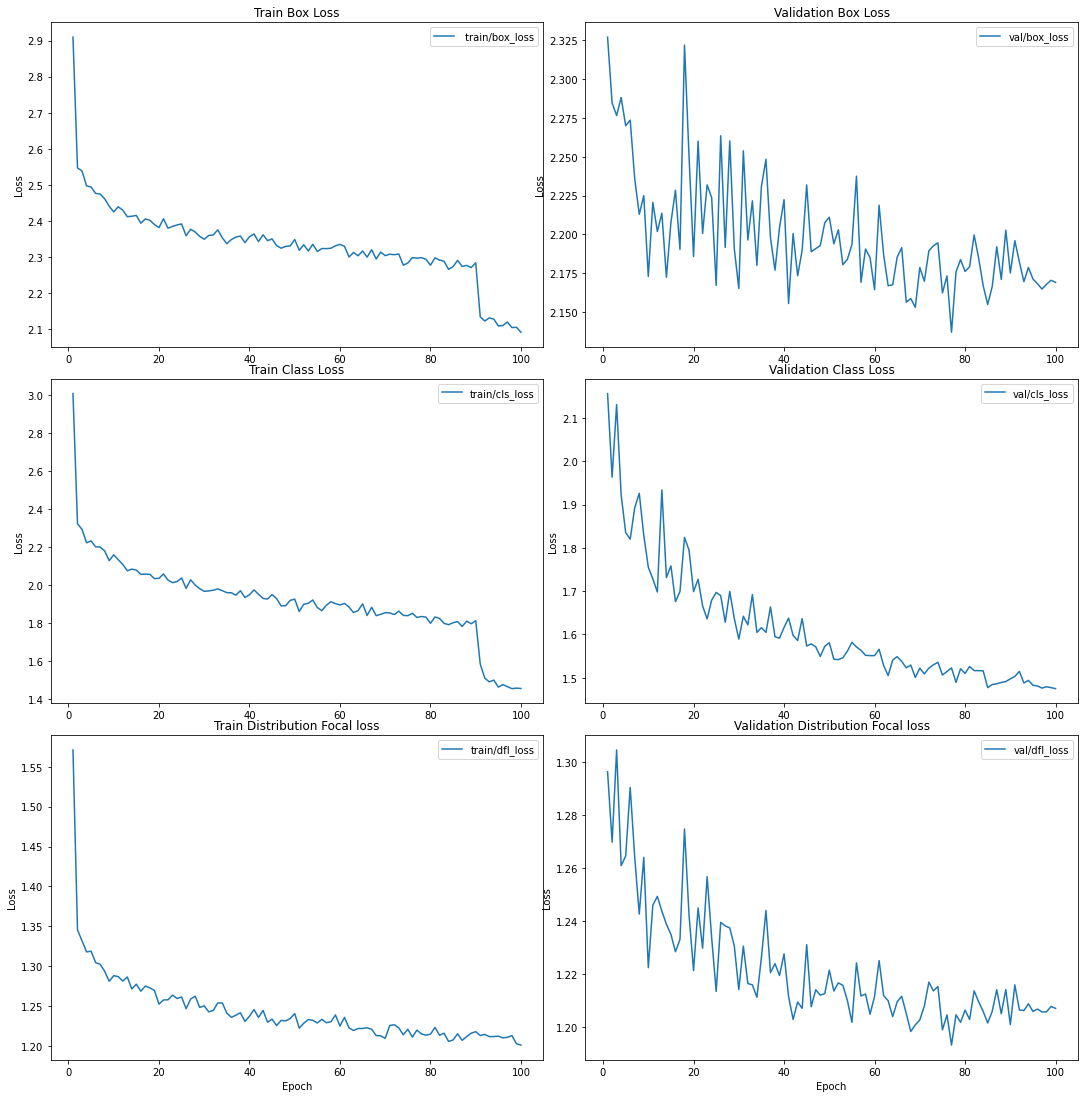

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

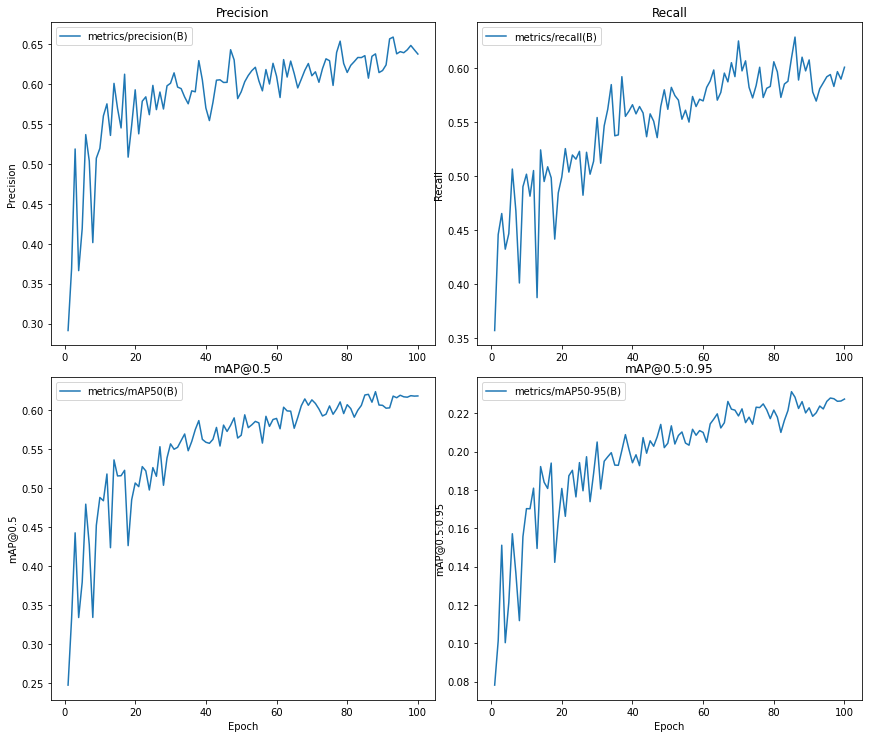

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

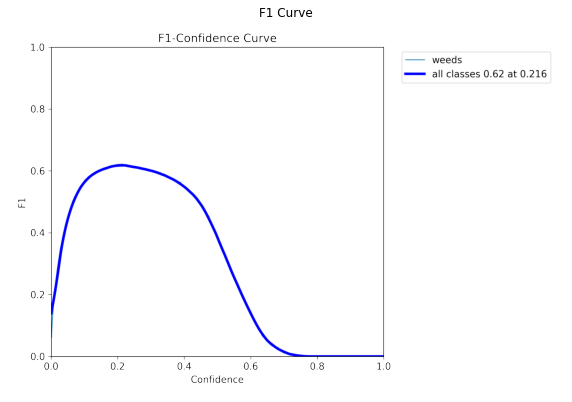

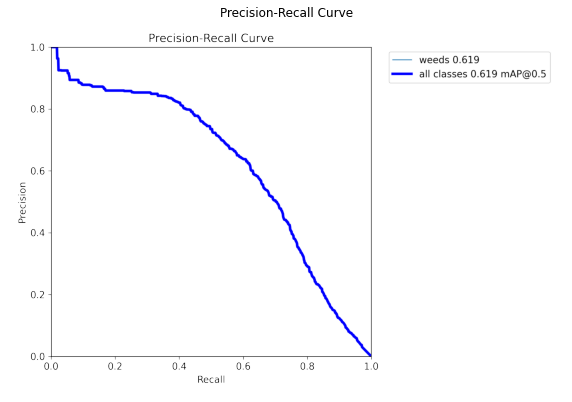

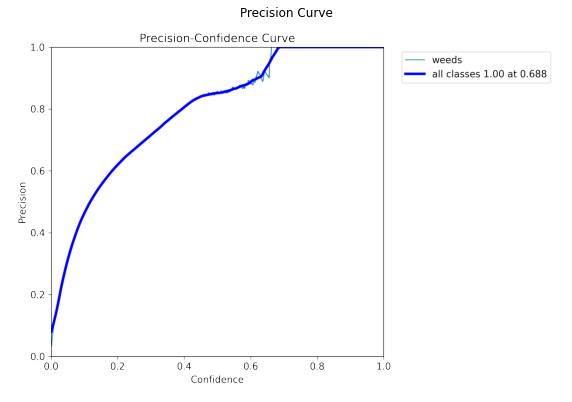

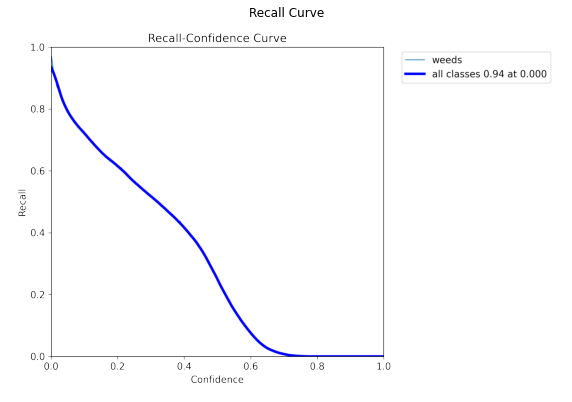

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11s/3_aug/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11s/3_aug/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11s/3_aug/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11s/3_aug/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

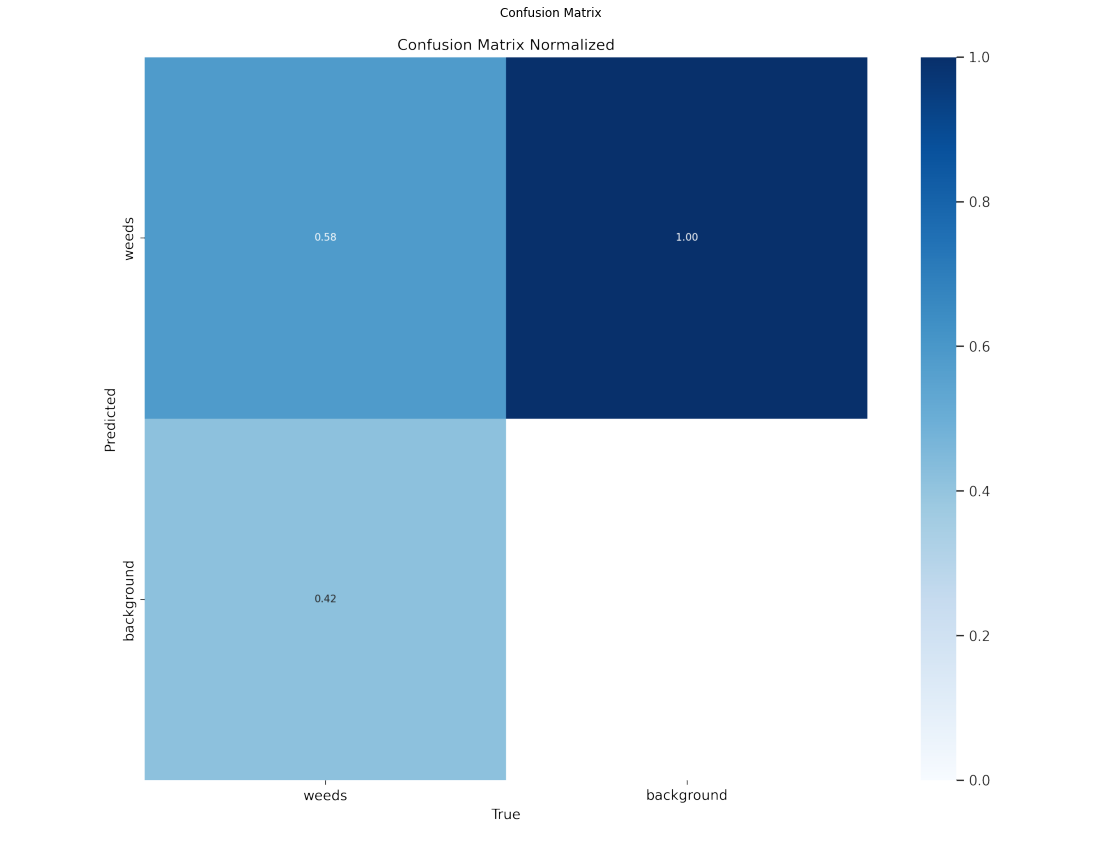

In [10]:
confusion_matrix = Image.open("YOLO11s/3_aug/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Weed_UAV/test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg: 416x416 1 weeds, 9.6ms
Speed: 0.6ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


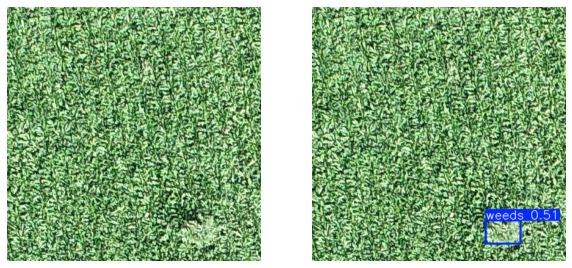

In [11]:
res = model('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();